## Homework 10 Assignment 1

In [ ]:
#worked with Sam Burns (shb395) and discussed the nature of how to test the model with the lr test

In [3]:
import statsmodels.formula.api as smf
import numpy as np
import pylab as pl
import pandas as pd

%matplotlib inline

In [4]:
ascdf = pd.read_csv('https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/Lab9_fb55/Asc.csv', \
                    sep='\t', header=None)

In [5]:
ascdf.head()

,0,1,2,3,4,5,6,7
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47


In [6]:
ascdf.shape

(11, 8)

In [7]:
ascdf.columns = ['X', 'Y1', 'temp', 'Y2', 1, 1, 1, 1]

In [8]:
ascdf.head()

,X,Y1,temp,Y2,1,1,1,1
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47


In [9]:
df = ascdf[['X', 'Y1', 'Y2']]

In [10]:
df.head()

,X,Y1,Y2
0,10.0,8.04,9.14
1,8.0,6.95,8.14
2,13.0,7.58,8.74
3,9.0,8.81,8.77
4,11.0,8.33,9.26


In [12]:
df.sort_values(by='X', inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [14]:
df

,X,Y1,Y2
7,4.0,4.26,3.10
10,5.0,5.68,4.74
6,6.0,7.24,6.13
9,7.0,4.82,7.26
1,8.0,6.95,8.14
3,9.0,8.81,8.77
0,10.0,8.04,9.14
4,11.0,8.33,9.26
8,12.0,10.84,9.13
2,13.0,7.58,8.74


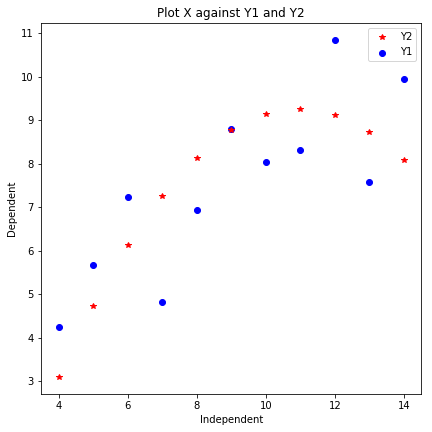

In [24]:
fig = pl.figure(figsize=(15,15))
ax1 = fig.add_subplot(221)
ax1.scatter(df['X'], df['Y1'], c='b', label='Y1')
ax1.plot(df['X'], df['Y2'], 'r*', label='Y2')
ax1.set_title('Plot X against Y1 and Y2')
ax1.set_xlabel('Independent')
ax1.set_ylabel('Dependent')
ax1.legend()


Figure 1: the scatter plot of Y2 against X is a very clean curve. Y1 seems to follow a similar curve, but seems to have more noise. It is likely when a line is fit to Y1, there will be a more residuals. 

### First Anscomby distribution: y1
##### OLS linear fit y1~x

In [ ]:
####VERY IMPORTANT 
#https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html
#No constant is added by the model unless you are using formulas.



In [27]:
fitols = smf.ols(formula='Y1 ~ X', data=df).fit()
fitols.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y1   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Sun, 25 Nov 2018   Prob (F-statistic):            0.00217
Time:                        16:53:10   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.0001      1.125      2.667      0.026         0.456     5.544
X              0.5001      0.118      4.241      0.002         0.233     0.767
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   2.788
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.289
Skew:                          -0.122   Prob(JB):                        0.865
Kurtosis:                       2.244   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

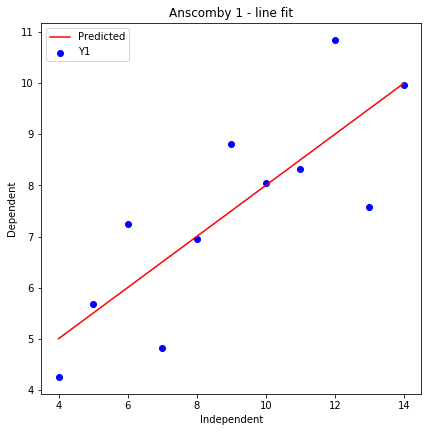

In [35]:
fig = pl.figure(figsize=(15,15))
ax1 = fig.add_subplot(221)
ax1.scatter(df['X'], df['Y1'], c='b', label='Y1')
ax1.plot(df['X'], fitols.predict(df), c='r', label='Predicted')
ax1.set_title('Anscomby 1 - line fit')
ax1.set_xlabel('Independent')
ax1.set_ylabel('Dependent')
ax1.legend()


Figure 2: Fit a line to Y1. Since this is a linear function, the line might not fit as well, as opposed to using a quadratic fit. That will be next. 

## OLS quadratic fit  y1~x^2 + x

In [36]:
#creating a new feature to make the formula quadratic
df['X2'] = df['X']**2

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [37]:
df.head()

,X,Y1,Y2,X2
7,4.0,4.26,3.10,16.0
10,5.0,5.68,4.74,25.0
6,6.0,7.24,6.13,36.0
9,7.0,4.82,7.26,49.0
1,8.0,6.95,8.14,64.0


In [38]:
fitols_quad = smf.ols(formula='Y1 ~ X2 + X',data=df).fit()
fitols_quad.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y1   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     8.793
Date:                Sun, 25 Nov 2018   Prob (F-statistic):            0.00956
Time:                        17:08:10   Log-Likelihood:                -16.487
No. Observations:                  11   AIC:                             38.97
Df Residuals:                       8   BIC:                             40.17
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.7551      3.288      0.230      0.824        -6.827     8.338
X2            -0.0316      0.043     -0.729      0.487        -0.132     0.068
X              1.0693      0.790      1.354      0.213        -0.752     2.891
==============================================================================
Omnibus:                        0.167   Durbin-Watson:                   2.957
Prob(Omnibus):                  0.920   Jarque-Bera (JB):                0.302
Skew:                          -0.220   Prob(JB):                        0.860
Kurtosis:                       2.318   Cond. No.                         954.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

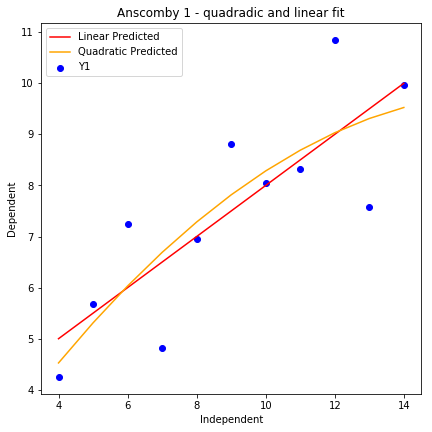

In [49]:
fig = pl.figure(figsize=(15,15))
ax1 = fig.add_subplot(221)
ax1.scatter(df['X'], df['Y1'], c='b', label='Y1')
ax1.plot(df['X'], fitols.predict(df), c='r', label='Linear Predicted')
ax1.plot(df['X'], fitols_quad.predict(df), c='orange', label='Quadratic Predicted')
ax1.set_title('Anscomby 1 - quadradic and linear fit')
ax1.set_xlabel('Independent')
ax1.set_ylabel('Dependent')
ax1.legend()

Figure 3: we can see the fit seems more applicable now then with the linear fit. likely the residuals have decreased. 

#### Compare the models with the LR ratio test¶

In [ ]:
alpha = .05

idea: simplier is often better, “is my more complex
model overfitting the data?”-- as seen in the notes

https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLSResults.compare_lr_test.html
from documentation "Likelihood ratio test to test whether restricted model is correct"

Null Hypothesis: the linear model (restricted model) is better or equal to representation of the complex model (polynomial)
Hypothesis: the complex model (polynomial) is better representation than the linear model (restricted model)

In [50]:
fitols_quad.compare_lr_test(fitols)

(0.70794919019374447, 0.40012547285804223, 1.0)

In [68]:
alpha > fitols_quad.compare_lr_test(fitols)[1]

False

Cannot reject the null that the linear model (restricted model) is better or equal to representation of the complex model (polynomial)

In [ ]:
### LR = -2 (log(Likelihood)_restricted - log(Likelihood)_complex)

In [97]:
-2 * (fitols.llf - fitols_quad.llf)

0.70794919019374447

### First Anscomby distribution: y2
##### OLS linear fit y2~x

In [51]:
fitols_y2 = smf.ols(formula='Y2 ~ X', data=df).fit()
fitols_y2.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y2   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Sun, 25 Nov 2018   Prob (F-statistic):            0.00218
Time:                        17:45:43   Log-Likelihood:                -16.846
No. Observations:                  11   AIC:                             37.69
Df Residuals:                       9   BIC:                             38.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.0009      1.125      2.667      0.026         0.455     5.547
X              0.5000      0.118      4.239      0.002         0.233     0.767
==============================================================================
Omnibus:                        1.594   Durbin-Watson:                   0.385
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                1.108
Skew:                          -0.567   Prob(JB):                        0.575
Kurtosis:                       1.936   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

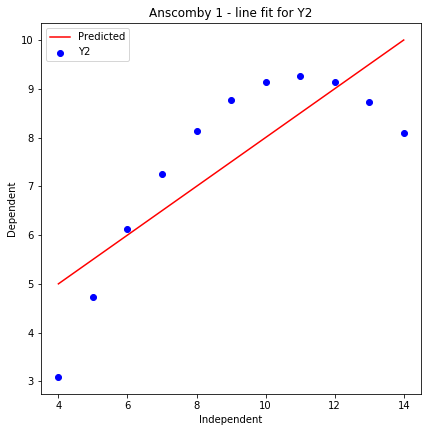

In [53]:
fig = pl.figure(figsize=(15,15))
ax1 = fig.add_subplot(221)
ax1.scatter(df['X'], df['Y2'], c='b', label='Y2')
ax1.plot(df['X'], fitols_y2.predict(df), c='r', label='Predicted')
ax1.set_title('Anscomby 1 - line fit for Y2')
ax1.set_xlabel('Independent')
ax1.set_ylabel('Dependent')
ax1.legend()


Figure 4: Fit a line to Y2. As we saw with Y1, this is a linear function and the line might not fit as well, as opposed to using a quadratic fit. That will be next. This may be more true of Y2 since it is a very clear quadratic line with out much of any noise. 

## OLS quadratic fit  y2~x^2 + x

In [54]:
#already created X2 for  quadratic formula
#df['X2'] = df['X']**2

In [55]:
df.head()

,X,Y1,Y2,X2
7,4.0,4.26,3.10,16.0
10,5.0,5.68,4.74,25.0
6,6.0,7.24,6.13,36.0
9,7.0,4.82,7.26,49.0
1,8.0,6.95,8.14,64.0


In [56]:
fitols_quad_y2 = smf.ols(formula='Y2 ~ X2 + X',data=df).fit()
fitols_quad_y2.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y2   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.378e+06
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           8.64e-26
Time:                        17:48:16   Log-Likelihood:                 56.471
No. Observations:                  11   AIC:                            -106.9
Df Residuals:                       8   BIC:                            -105.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -5.9957      0.004  -1384.713      0.000        -6.006    -5.986
X2            -0.1267   5.71e-05  -2219.238      0.000        -0.127    -0.127
X              2.7808      0.001   2673.741      0.000         2.778     2.783
==============================================================================
Omnibus:                        2.566   Durbin-Watson:                   2.928
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.697
Skew:                           0.809   Prob(JB):                        0.428
Kurtosis:                       1.959   Cond. No.                         954.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

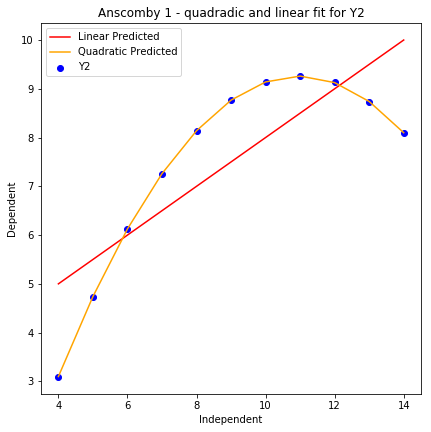

In [57]:
fig = pl.figure(figsize=(15,15))
ax1 = fig.add_subplot(221)
ax1.scatter(df['X'], df['Y2'], c='b', label='Y2')
ax1.plot(df['X'], fitols_y2.predict(df), c='r', label='Linear Predicted')
ax1.plot(df['X'], fitols_quad_y2.predict(df), c='orange', label='Quadratic Predicted')
ax1.set_title('Anscomby 1 - quadradic and linear fit for Y2')
ax1.set_xlabel('Independent')
ax1.set_ylabel('Dependent')
ax1.legend()

Figure 5: this looks like the quadratic model is overfitted since it crosses through every point. We will see with testing. 

#### Compare the models with the LR ratio test¶

In [66]:
alpha = .05

Null Hypothesis: the linear model (restricted model) is better or equal to representation of the complex model (polynomial)
Hypothesis: the complex model (polynomial) is better representation than the linear model (restricted model)

In [58]:
fitols_quad_y2.compare_lr_test(fitols_y2)

(146.63437980392047, 9.4331834208378821e-34, 1.0)

In [67]:
alpha > fitols_quad_y2.compare_lr_test(fitols_y2)[1]

True

We can reject the null that the linear model (restricted model) is better or equal to representation of the complex model (polynomial). 

as this is a small sample size, it would be interesting if more data was included would it introduce more noise and in turn create a less overfitted model?

### Derive the same result 

In [ ]:
### LR = -2 (log(Likelihood)_restricted - log(Likelihood)_complex)

In [96]:
-2 * (fitols_y2.llf - fitols_quad_y2.llf)

146.63437980392047